In [1]:
data_file_in = "data/recording_62.wav" # <--- CHANGE THIS!!
five = 1 # <--- AND THIS IF NEEDED!

In [2]:
from receiver import receiver
import matplotlib.pyplot as plt

Chirp_p_s Prefix Length: 1024
Chirp_p_s Suffix Length: 1024
Chirp_p_s Length: 67568
Sample rate (wav) =  48000


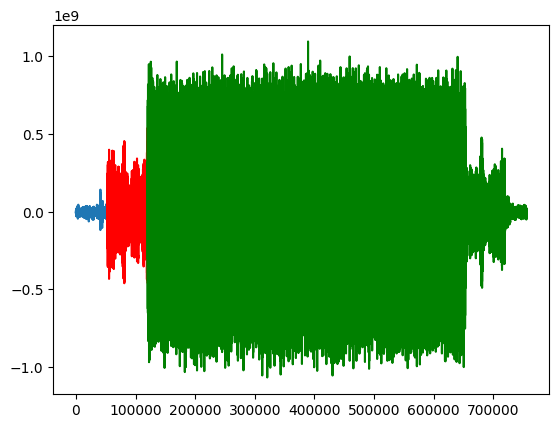

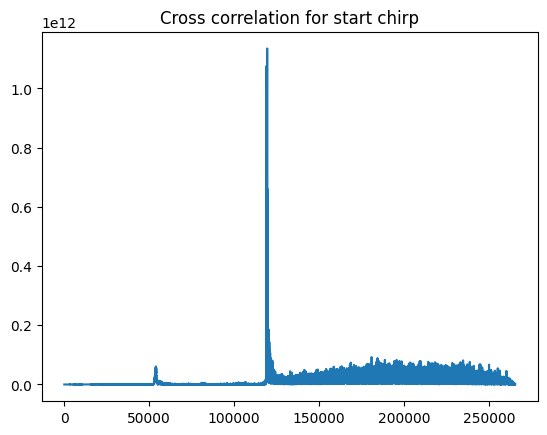

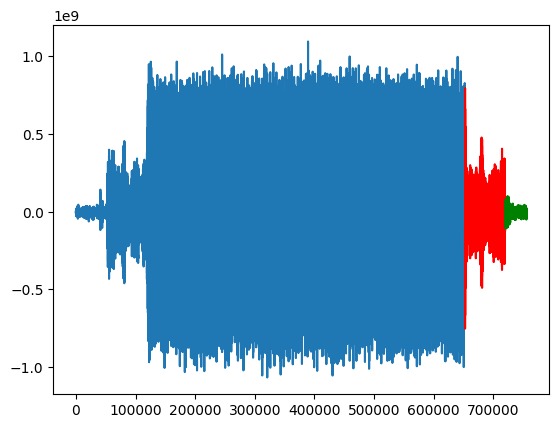

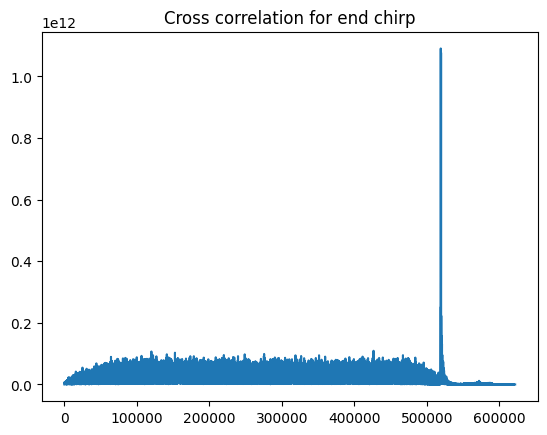

In [3]:
r = receiver()

# entire_data = np.loadtxt('data/benson_testing1.csv', delimiter = ",", dtype = "float")

entire_data = r.read_wav(data_file_in)

### FIND CROSS CORRELATIONS (start and end chirps)

start_index, cross_correlation = r.find_start_index(entire_data)

plt.plot(cross_correlation)
plt.title("Cross correlation for start chirp")
plt.show()

end_index, cross_correlation = r.find_start_index(entire_data, position = "end")

plt.plot(cross_correlation)
plt.title("Cross correlation for end chirp")
plt.show()


In [4]:
### FIND LENGTH AND SEPERATE DATA BLOCK

end_index = end_index - r.ofdm_prefix_size # ???
data_index = r.find_data_index(entire_data, start_index)
data_length = end_index - data_index

print("Data Length:", data_length)

num_symbols = data_length // (r.ofdm_symbol_size + r.ofdm_prefix_size) # Floor division may mean that we loose some data at the end?
data_block = entire_data[data_index : data_index + (num_symbols) * (r.ofdm_symbol_size + r.ofdm_prefix_size)]

r.bits = int(num_symbols * r.c.K)
print("Bits:", r.bits)

data = r.data_block_processing(data_block, known_blocks = five)

print("Data: ", data[0:100])
print(r.decode_text(data)[0:100])

data_without_header = r.extract_header(data)
r.save_decoded_file(data_without_header, r.bits)

Data Length: 532045
Bits: 66744
Len of Data_block: 527360
Number of OFDM Symbols: 103
[ 1.00000000e+00+0.00000000e+00j -1.99268629e+09-2.90430711e+09j
  4.99058880e+09-5.28441905e+09j ... -6.02310175e+09-6.68885104e+08j
  4.99058880e+09+5.28441905e+09j -1.99268629e+09+2.90430711e+09j]
Initial sigma2 estimate =  10
Decoding symbol no.  0
Decoding symbol no.  1
Decoding symbol no.  2
Decoding symbol no.  3
Decoding symbol no.  4
Decoding symbol no.  5
Decoding symbol no.  6
Decoding symbol no.  7
Decoding symbol no.  8
Decoding symbol no.  9
Decoding symbol no.  10
Decoding symbol no.  11
Decoding symbol no.  12
Decoding symbol no.  13
Decoding symbol no.  14
Decoding symbol no.  15
Decoding symbol no.  16
Decoding symbol no.  17
Decoding symbol no.  18
Decoding symbol no.  19
Decoding symbol no.  20
Decoding symbol no.  21
Decoding symbol no.  22
Decoding symbol no.  23
Decoding symbol no.  24
Decoding symbol no.  25
Decoding symbol no.  26
Decoding symbol no.  27
Decoding symbol no.  2